### Data Science by Different Industries Analysis

We use the National_Employment_Matrix_OCC_15-2051.csv for this Analysis

Imports

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load CSV 

In [6]:
# Relative path from script to CSV
csv_path = "../../data/National_Employment_Matrix_OCC_15-2051.csv"

# Load the CSV

df = pd.read_csv(csv_path)

unique_industries = df["Industry Title"].unique()

Top 10 Industries Employing Data Science for 2024

C:\Users\julia\AppData\Local\Temp\ipykernel_22408\917371728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industries["2024 Percent of Occupation"] = pd.to_numeric(
C:\Users\julia\AppData\Local\Temp\ipykernel_22408\917371728.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


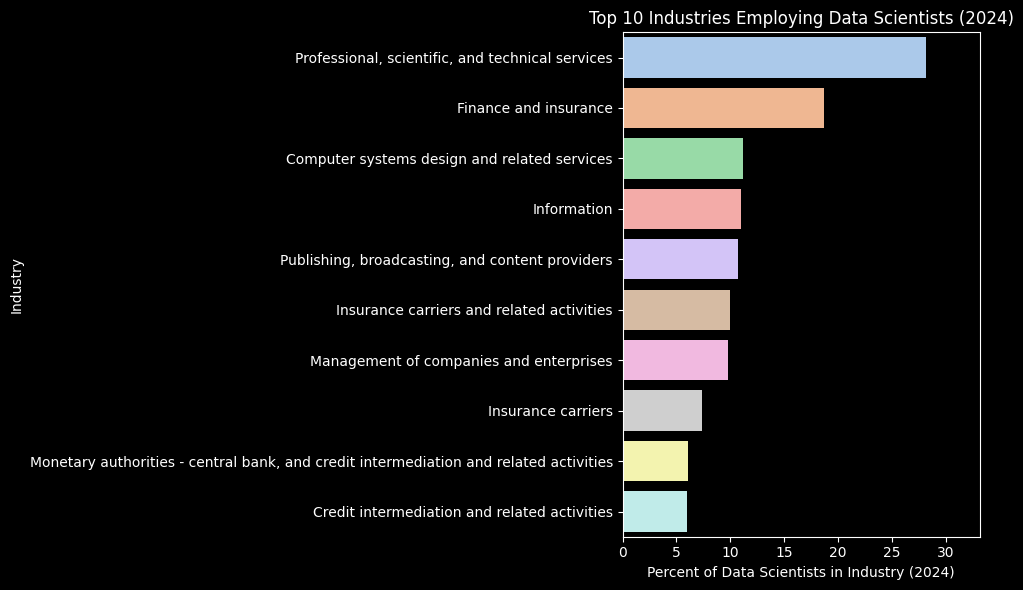

In [7]:

df_industries = df[
    (df["Industry Title"] != "Total, all industries") &
    (df["Industry Title"] != "Total wage and salary employment")
]


# Ensure Percent of Occupation is numeric
df_industries["2024 Percent of Occupation"] = pd.to_numeric(
    df_industries["2024 Percent of Occupation"], errors='coerce'
)

# drop duplicates
df_industries = df_industries.drop_duplicates(subset="Industry Title")

# Top 10 industries by 2024 Percent of Occupation
top10 = df_industries.sort_values(
    by="2024 Percent of Occupation", ascending=False
).head(10)



plt.figure(figsize=(10,6), facecolor='black')
ax = sns.barplot(
    x="2024 Percent of Occupation",
    y="Industry Title",
    data=top10,
    palette="pastel"
)

# Set axis and text colors to white
ax.set_facecolor('black')               # Axis background
ax.tick_params(colors='white')          # Tick labels
ax.xaxis.label.set_color('white')       # X-axis label
ax.yaxis.label.set_color('white')       # Y-axis label
ax.title.set_color('white')             # Title
for spine in ax.spines.values():        # Axis borders
    spine.set_color('white')

plt.xlabel("Percent of Data Scientists in Industry (2024)")
plt.ylabel("Industry")
plt.title("Top 10 Industries Employing Data Scientists (2024)")
plt.xlim(0, top10["2024 Percent of Occupation"].max() + 5)
plt.tight_layout()
plt.show()